In [22]:
# !pip install scikit-learn
import sklearn
# print(sklearn.__version__)

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv("../data/insurance.csv")

In [24]:
df.info() #to check if there's null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: xlabel='charges', ylabel='Count'>

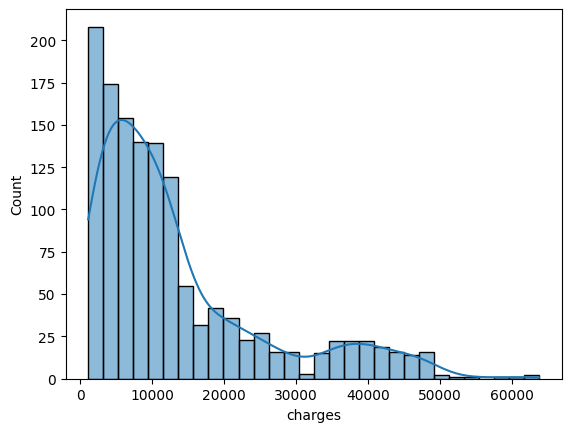

In [27]:
sns.histplot(df['charges'], kde=True)

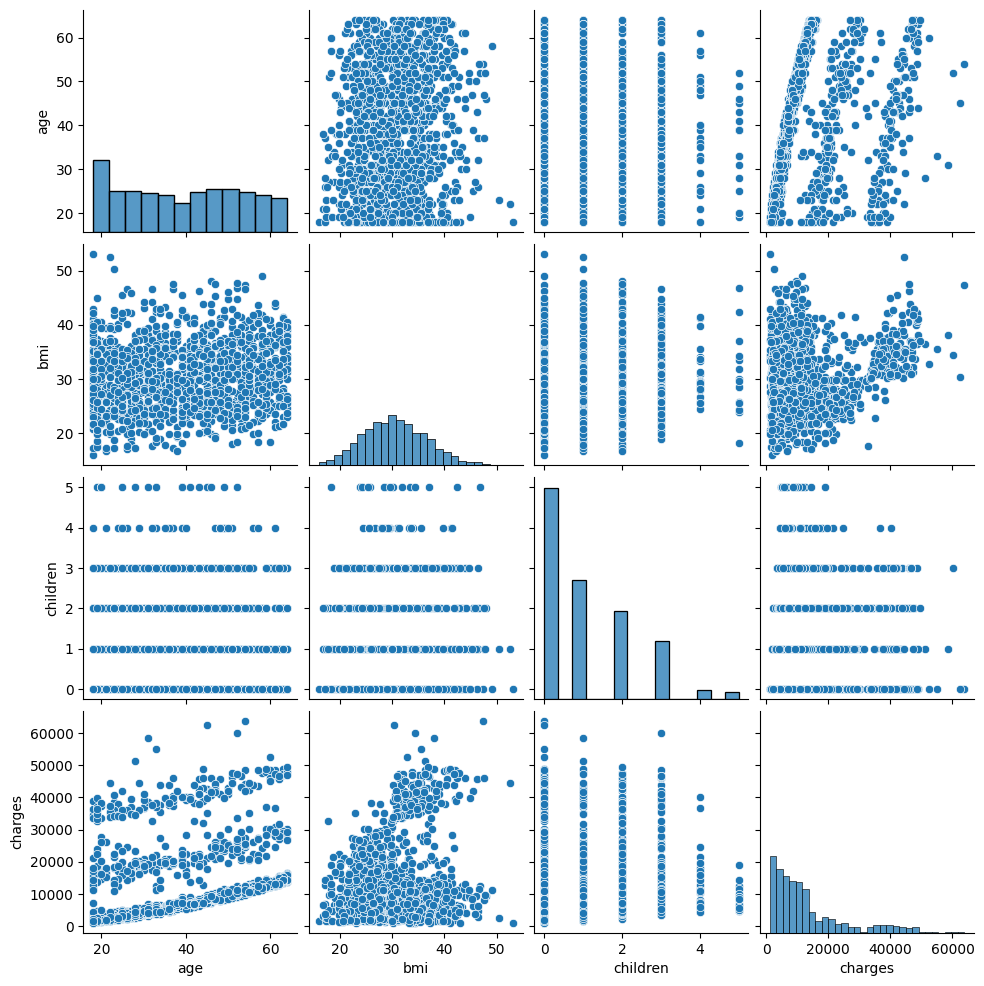

In [28]:
sns.pairplot(df)
plt.show()

In [29]:
# One-Hot Encoding for Categorical Variables
Cate_cols = ['sex', 'smoker', 'region']
df = pd.get_dummies(df, columns= Cate_cols, drop_first=True)

In [30]:
#defining deatures and targets 
X = df.drop('charges',axis=1)

In [31]:
y=df['charges']

In [32]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


In [33]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [35]:
#Scaling features
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Linear Regression**

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [38]:
y_pred= model.predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error 
rmse_linear = np.sqrt(mean_squared_error(y_test,y_pred))

In [40]:
rmse_linear

np.float64(5803.762514494929)

#### Calculate and plot residuals

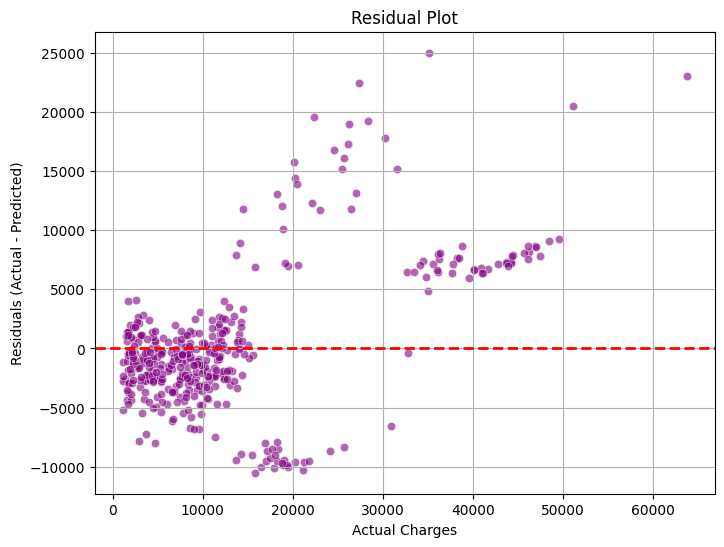

In [41]:
test_residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=test_residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

plt.title("Residual Plot")
plt.xlabel("Actual Charges")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.show()

#### Conclusion
*The residual plot shows that our linear regression model is not predicting well for people with very high medical charges. The difference between the actual and predicted values becomes bigger as the charges increase. This means the model is not able to capture some patterns in the data, especially for higher values. So, a more advanced model like polynomial regression or decision trees might work better.*

# **Polynomial Regression**

In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Checking best degree 

In [43]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


In [44]:
# Since X is already scaled 
train_rmse_error = []
test_rmse_error = []

In [45]:
for d in range(1,10):
    polynomial_converter = PolynomialFeatures(degree=d,include_bias = False)
    poly_feature = polynomial_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_feature, y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train , y_train)

    train_predi = model.predict(X_train)
    test_predi = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train,train_predi))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_predi))

    train_rmse_error.append(train_rmse)
    test_rmse_error.append(test_rmse)

### Visualize

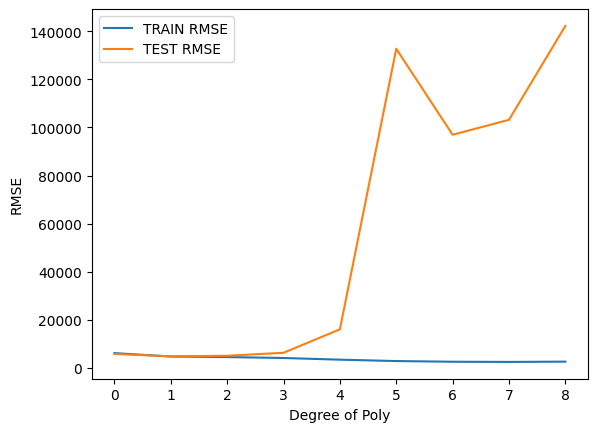

In [46]:
plt.plot(train_rmse_error,label='TRAIN RMSE') 
plt.plot(test_rmse_error,label='TEST RMSE')

plt.ylabel('RMSE')
plt.xlabel('Degree of Poly')
plt.legend()      #plt.legend() tells matplotlib to show a box with those labels

In [47]:
test_rmse_error

[np.float64(5803.762514494928),
 np.float64(4801.234049648948),
 np.float64(5061.527770695461),
 np.float64(6297.143908769023),
 np.float64(16054.609293848025),
 np.float64(132743.54381554018),
 np.float64(96986.21441243711),
 np.float64(103187.12625249737),
 np.float64(142243.81391686373)]

In [48]:
train_rmse_error

[np.float64(6159.937152002981),
 np.float64(4750.841747698698),
 np.float64(4516.132857603174),
 np.float64(4131.006443438435),
 np.float64(3434.9859744253354),
 np.float64(2857.7450530690144),
 np.float64(2573.44224575503),
 np.float64(2497.714776474533),
 np.float64(2611.001157164176)]

In [49]:
# Create DataFrame
rmse_df = pd.DataFrame({
    'Degree': list(range(1, 10)),
    'Train_RMSE': train_rmse_error,
    'Test_RMSE': test_rmse_error
})

# Display
rmse_df

,Degree,Train_RMSE,Test_RMSE
0,1,6159.937152,5803.762514
1,2,4750.841748,4801.234050
2,3,4516.132858,5061.527771
3,4,4131.006443,6297.143909
4,5,3434.985974,16054.609294
5,6,2857.745053,132743.543816
6,7,2573.442246,96986.214412
7,8,2497.714776,103187.126252
8,9,2611.001157,142243.813917


* Degree 2 provides the best fit.
* It achieves a low test RMSE without overfitting, unlike higher degrees which reduce training error but significantly increase testing error, indicating overfitting.

#### **Conclusion:** *Polynomial Regression (Degree 2) performed better than Linear Regression (Degree 1 by achieving a lower RMSE on the test set.*

# K-Nearest Neighbors (KNN) 

In [50]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [51]:
#defining deatures and targets 
X = df.drop('charges',axis=1)

In [52]:
y=df['charges']

In [53]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [55]:
#Scaling features
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Choosing the best K
* KNeighborsClassifier → for classification tasks
* KNeighborsRegressor → for regression tasks

In [57]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

test_rmse_errors = []

for k in range(1, 30):
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    y_pred_test = knn_model.predict(scaled_X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_rmse_errors.append(rmse)

### Plot Error vs. K

Text(0.5, 0, 'K Value')

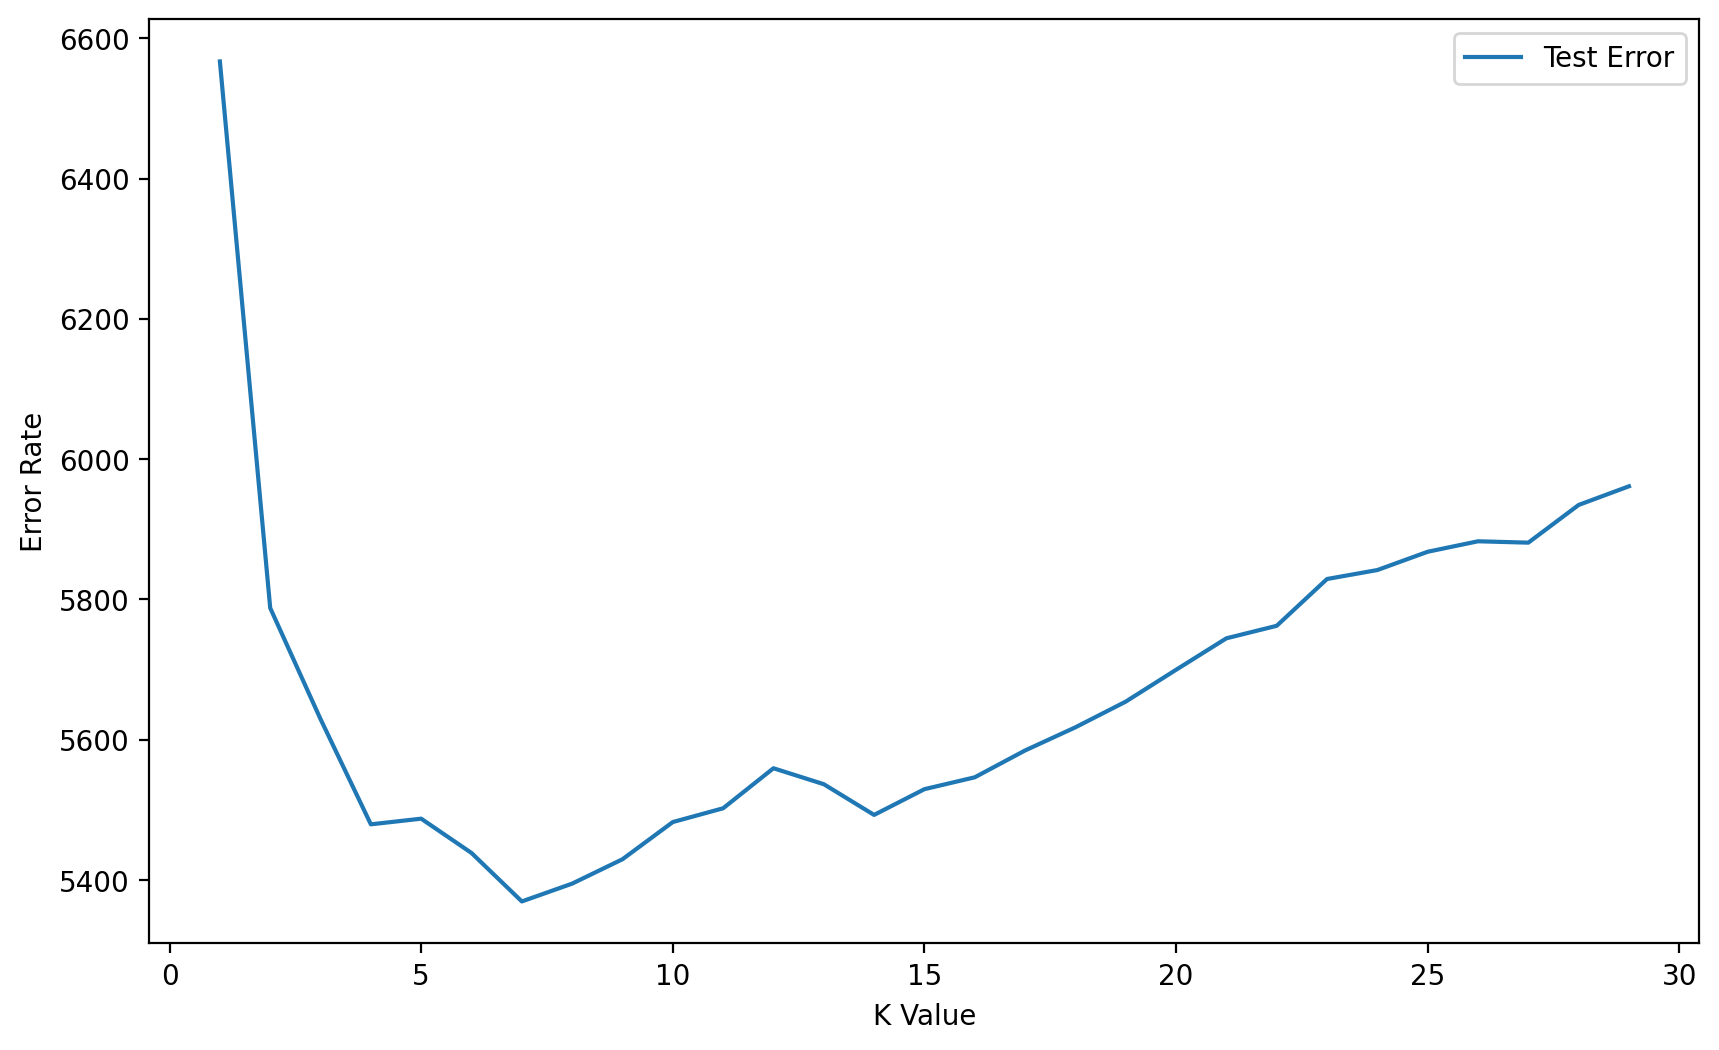

In [58]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_rmse_errors,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [59]:
test_rmse_errors

[np.float64(6566.951589179723),
 np.float64(5787.902205567551),
 np.float64(5629.503928481208),
 np.float64(5479.522500258554),
 np.float64(5487.572243853971),
 np.float64(5438.68184388971),
 np.float64(5369.594150756489),
 np.float64(5395.006663609173),
 np.float64(5429.747780773401),
 np.float64(5482.7590510367),
 np.float64(5502.411017721614),
 np.float64(5559.447079320032),
 np.float64(5536.731164845693),
 np.float64(5492.939061512586),
 np.float64(5529.623749687327),
 np.float64(5546.54698717858),
 np.float64(5584.794541992569),
 np.float64(5617.797852111044),
 np.float64(5654.415385891451),
 np.float64(5699.793022468513),
 np.float64(5744.663971255984),
 np.float64(5762.498490476738),
 np.float64(5829.220589469285),
 np.float64(5841.972588877762),
 np.float64(5868.031698400828),
 np.float64(5882.9827052584105),
 np.float64(5881.018457143698),
 np.float64(5934.773423160078),
 np.float64(5961.378276831868)]

Once you have a good idea of which range of k works best (say, 5–10), now you:
* Automate finding the best k.
* Use cross-validation for more reliable evaluation.
* Combine scaling + modeling in one unit (Pipeline).

### Pipeline + GridSearchCV for KNN Regression

In [60]:
scaler = StandardScaler()
knn = KNeighborsRegressor()

operations = [('scaler',scaler),('knn',knn)]
from sklearn.pipeline import Pipeline
pipe = Pipeline(operations)

In [61]:
from sklearn.model_selection import GridSearchCV

k_values = list(range(1, 20))
param_grid = {'knn__n_neighbors': k_values}

grid_model = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_model.fit(X_train, y_train)

,estimator,Pipeline(step...Regressor())])
,param_grid,"{'knn__n_neighbors': [1, 2, ...]}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


### 1. Check the Best Parameters Found by GridSearch

In [62]:
print("Best k value:", grid_model.best_params_)

Best k value: {'knn__n_neighbors': 8}


### View the Best Score (lowest RMSE)

In [63]:
print("Best CV RMSE:", -grid_model.best_score_)

Best CV RMSE: 5752.416085860101


### Make Predictions on Test Set

In [64]:
y_pred = grid_model.predict(X_test)

### Evaluate Model Performance on Test Set

In [65]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

knn_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
knn_r2 = r2_score(y_test, y_pred)

print("Test RMSE:", knn_rmse)
print("Test R² Score:", knn_r2)

Test RMSE: 5395.006663609173
Test R² Score: 0.7928055061945819


### Calculate and plot Residuals

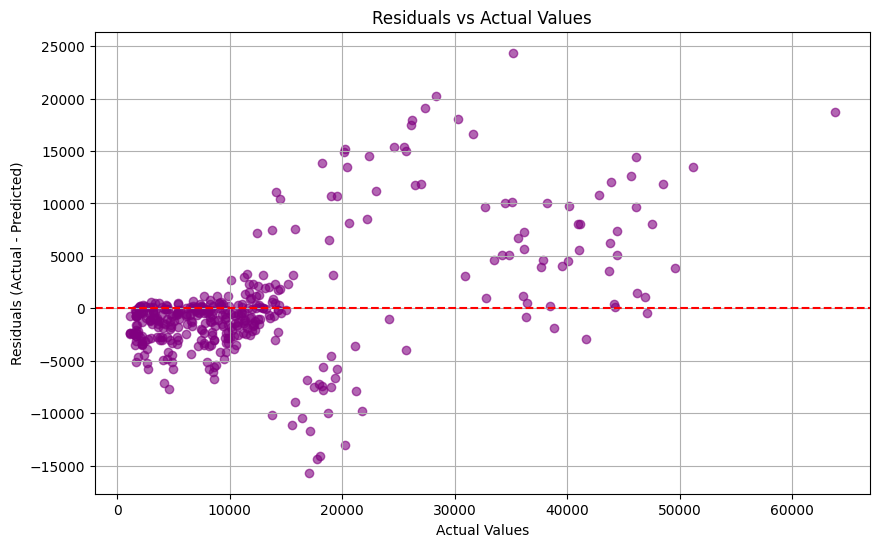

In [66]:
residuals = y_test - y_pred
plt.figure(figsize=(10,6), dpi=100)
plt.scatter(y_test, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Actual Values")
plt.grid(True)
plt.show()

#### **Conclusion**: Your model is good at predicting small numbers, but it's very bad at predicting large numbers. The bigger the true value is, the bigger the potential error of your model's prediction will be.